# Autograd


In [6]:
import torch

In [7]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-1.6457,  0.2145, -0.3405], requires_grad=True)


In [18]:
y = x + 2
print(y)

z = y * y * 2
print(z)

# a = z.mean()
# print(a)

# we have to pass 'v' because z is not scalar
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)  # dz/dx
print(x.grad)


tensor([0.3543, 2.2145, 1.6595], grad_fn=<AddBackward0>)
tensor([0.2511, 9.8080, 5.5080], grad_fn=<MulBackward0>)
tensor([ 1.2283, 23.6213,  4.4387])


In [25]:
# Removing autograd to the tensor

x = torch.randn(3, requires_grad=True)

# y = x.detach()
# x.requires_grad_(False)

with torch.no_grad():
    y = x + 2

print(x)
print(y)


tensor([ 0.0904, -0.5216,  0.4998], requires_grad=True)
tensor([2.0904, 1.4784, 2.4998])


In [31]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()  # reset the gradient

# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backpropogation

- Forward pass : Compute loss
- Compute local gradients
- Backward pass: Compute dLoss/dWeights using the chain rule

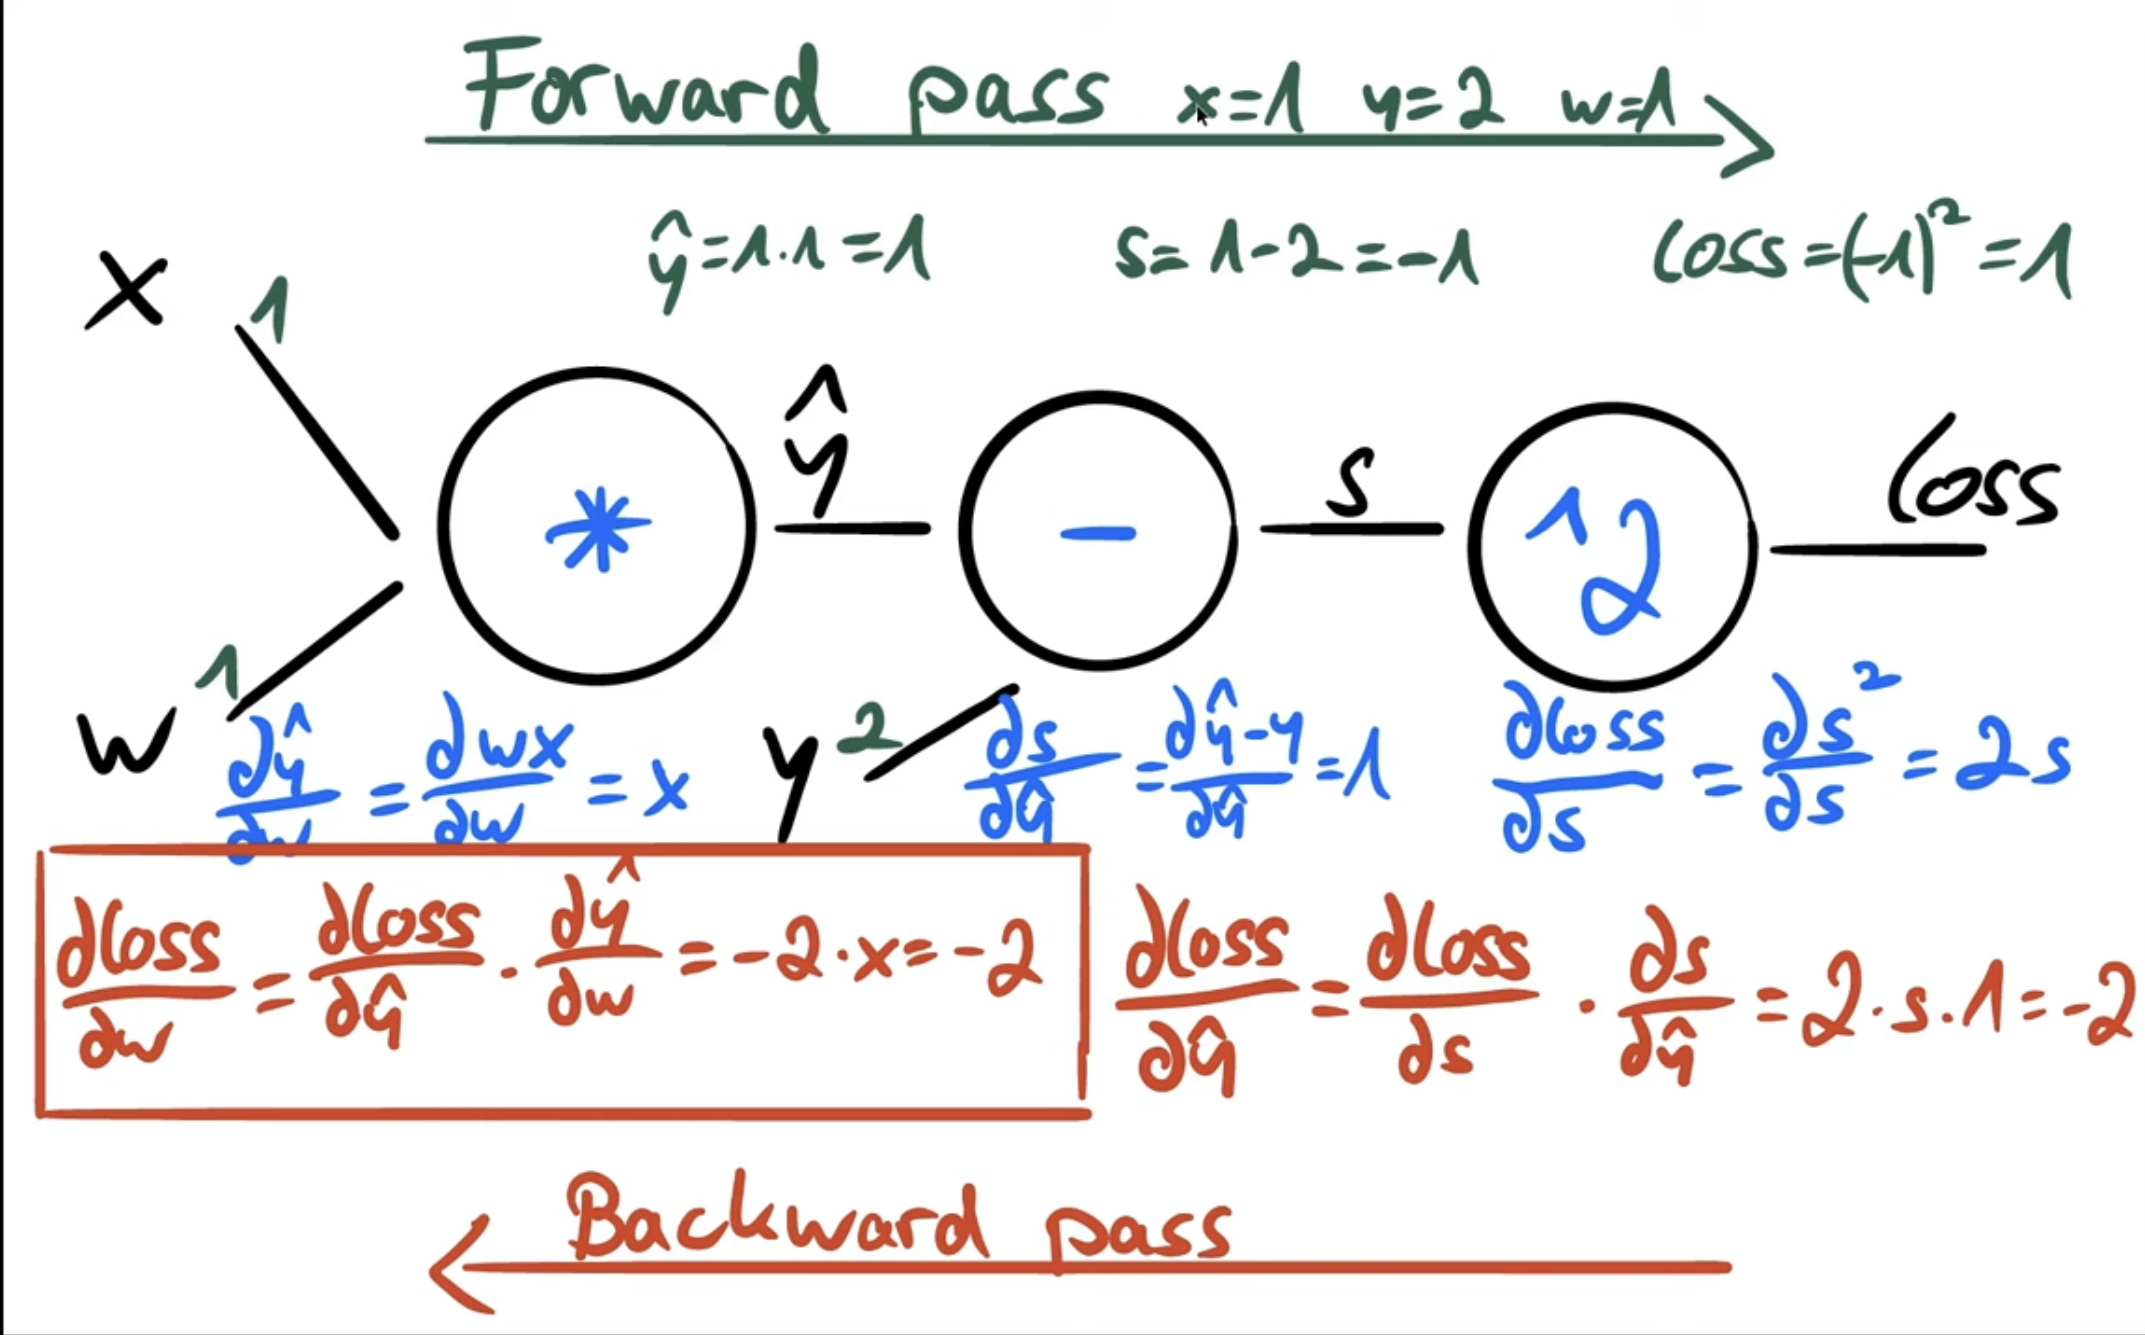

In [38]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# Forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

# Backward pass
loss.backward() # Computes all gradients backward
print(w.grad) # dLoss/dW

# Update our weights

# Next forward and backward passes

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)
